<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/01_supervised_learning/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression

Regression is a supervised learning technique used to predict a continuous target variable based on one or more input features.

In this notebook, you'll learn:
- What regression is
- Types of regression
- How to build a simple linear regression model
- How to evaluate a regression model


### **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Visual settings
sns.set(style="whitegrid")

### **Generate or Load Sample Dataset**

In [2]:
# Using synthetic data
np.random.seed(42)
X = 2.5 * np.random.randn(100) + 1.5   # Feature
y = 0.5 * X + np.random.randn(100)    # Target with noise

# Convert to DataFrame
df = pd.DataFrame({'Feature': X, 'Target': y})
df.head()

,Feature,Target
0,2.741785,-0.044478
1,1.154339,0.156524
2,3.119221,1.216896
3,5.307575,1.851510
4,0.914617,0.296023


### **Visualize the Data**

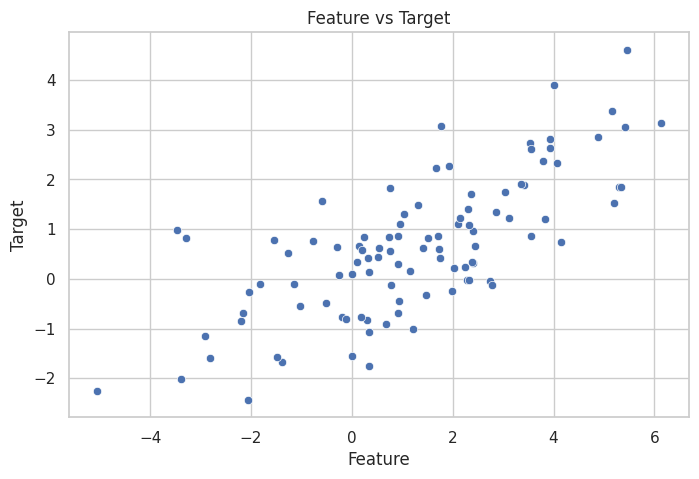

In [3]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Feature', y='Target', data=df)
plt.title("Feature vs Target")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

### **Train-Test Split**

In [4]:
X = df[['Feature']]  # 2D shape
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Create and Train the Model**

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 0.09948120963999396
Coefficient: 0.44340367002715714


### **Make Predictions**

In [6]:
y_pred = model.predict(X_test)

# Create a comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
0,0.584635,0.190079
1,1.746849,1.442635
2,0.312230,1.165197
3,0.632018,-0.033367
4,-0.838270,-0.874368


### **Plot the Regression Line**

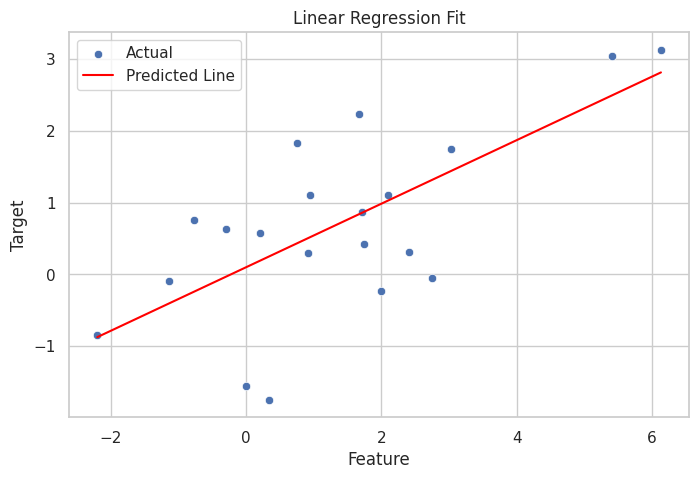

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label="Actual")
sns.lineplot(x=X_test.squeeze(), y=y_pred, color="red", label="Predicted Line")
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

### **Evaluate the Model**

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.8728486123745253
R² Score: 0.4616942938725014


### **When to Use Linear Regression**

When is Linear Regression a Good Fit?
- When the relationship between features and target is linear
- When errors are normally distributed and independent
- When multicollinearity between features is low

Linear regression is not ideal if the data shows curvature, outliers, or categorical targets.


### **Extension: Multiple Linear Regression (Optional)**


In [9]:
# Extended dataset
np.random.seed(0)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
y = 3 + 2*X1 + 4*X2 + np.random.randn(100) * 0.2

df_multi = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
X = df_multi[['X1', 'X2']]
y = df_multi['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model_multi = LinearRegression().fit(X_train, y_train)

print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)

Intercept: 3.095717007009532
Coefficients: [1.86083426 3.91709845]


### **Summary**
- You learned what regression is and how to apply it.
- Built a linear regression model with scikit-learn.
- Evaluated the model using MSE and R².
- Touched on multiple regression for multivariable scenarios.

**Next:** Explore classification models in `classification.ipynb`.
